In [ ]:
import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host="host",
    user="user", 
    password="password",
    database="customer_churn"
)
cursor = conn.cursor()

# Execute query
query = "SELECT * FROM customers"
cursor.execute(query)

# Fetch data
data = cursor.fetchall()

# Get column names (AFTER executing the query)
columns = [col[0] for col in cursor.description]

# Convert to DataFrame
df = pd.DataFrame(data, columns=columns)

# Close connection
cursor.close()
conn.close()

print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO  Female              0     Yes        Yes       9   
1     0003-MKNFE    Male              0      No         No       9   
2     0004-TLHLJ    Male              0      No         No       4   
3     0011-IGKFF    Male              1     Yes         No      13   
4     0013-EXCHZ  Female              1     Yes         No       3   
...          ...     ...            ...     ...        ...     ...   
7038  9987-LUTYD  Female              0      No         No      13   
7039  9992-RRAMN    Male              0     Yes         No      22   
7040  9992-UJOEL    Male              0      No         No       2   
7041  9993-LHIEB    Male              0     Yes        Yes      67   
7042  9995-HOTOH    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             Yes                No             DSL             No  ...   
1        

In [9]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
df.drop('customerID',axis=1,inplace=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


In [12]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [13]:
for i in df.columns:
    print(df[i].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No

In [14]:
df['PaymentMethod']=df['PaymentMethod'].replace({'Bank transfer (automatic)':'Automatic','Credit card (automatic)':'Automatic'})
df['PaymentMethod'].value_counts()

PaymentMethod
Automatic           3066
Electronic check    2365
Mailed check        1612
Name: count, dtype: int64

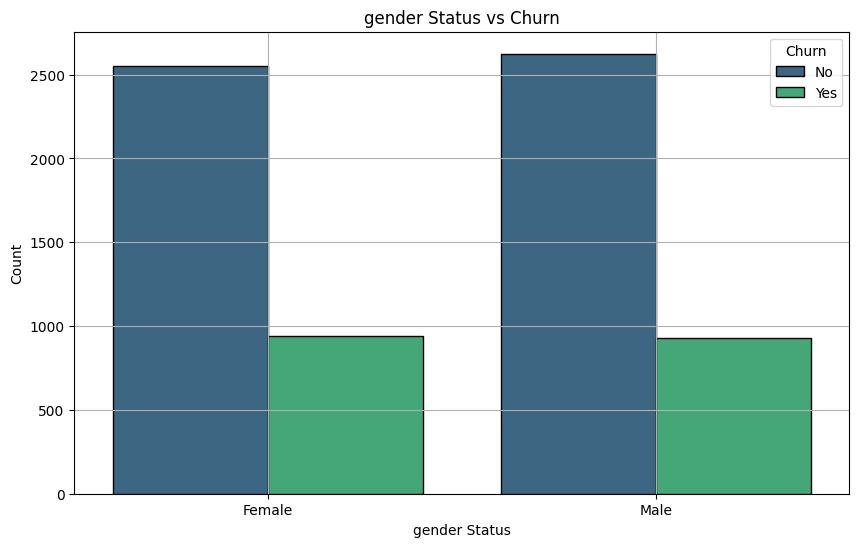

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='Churn', palette='viridis', edgecolor='black')

plt.title('gender Status vs Churn')
plt.xlabel('gender Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

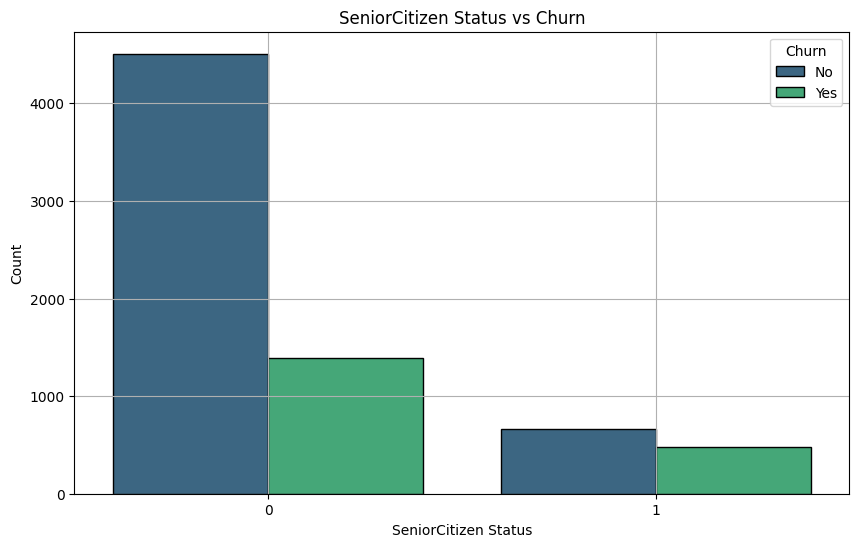

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='viridis', edgecolor='black')

plt.title('SeniorCitizen Status vs Churn')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

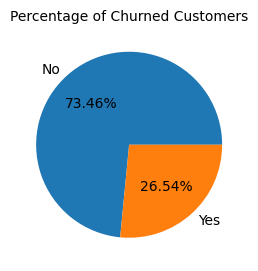

In [19]:
plt.figure(figsize=(3,4))

# Group data by 'Churn' and count occurrences
gb = df.groupby('Churn').agg({'Churn': "count"})

# Create a pie chart
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")

# Add a title
plt.title("Percentage of Churned Customers", fontsize=10)

# Show the plot
plt.show()

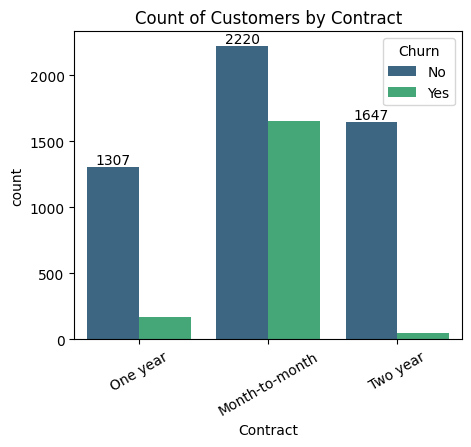

In [20]:
plt.figure(figsize=(5,4)) 

# Create a count plot
ax = sns.countplot(x="Contract", data=df, hue="Churn",palette="viridis")  # Custom color palette

# Add count labels on top of bars
ax.bar_label(ax.containers[0])

# Customize title
plt.title("Count of Customers by Contract", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Show the plot
plt.show()

In [ ]:
#this indicates that people with month to month contract are more likely to churn

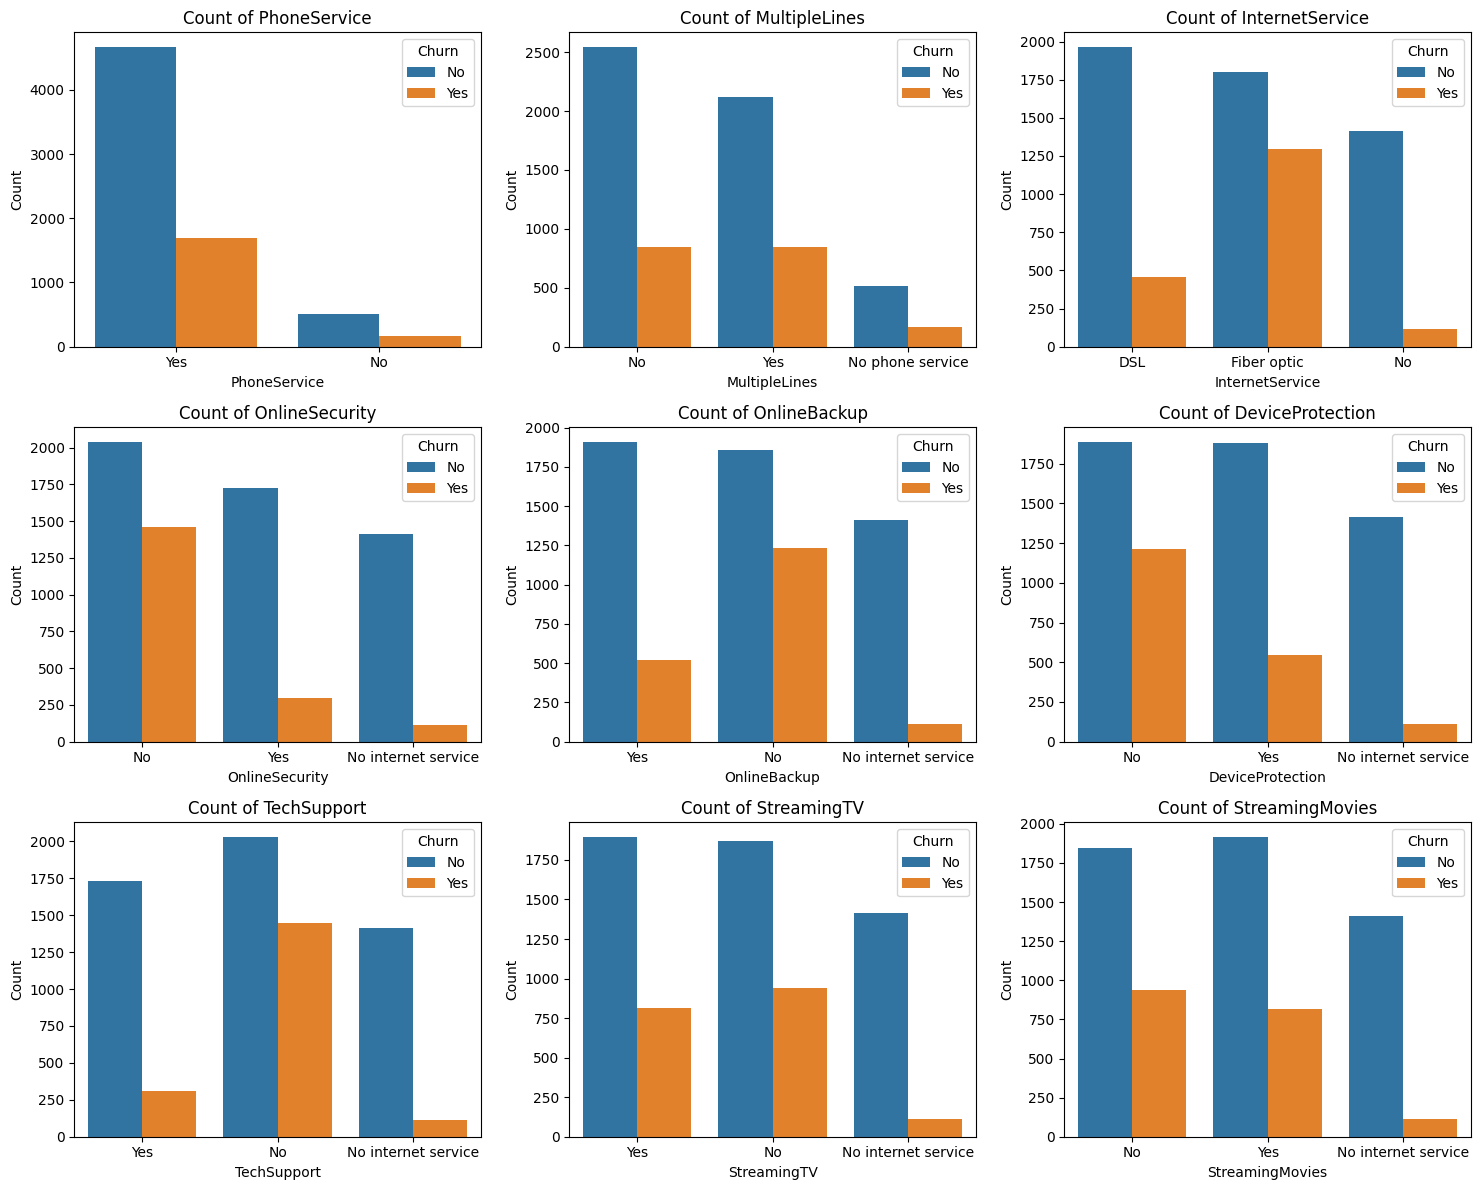

In [21]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set the number of subplots (rows, columns)
n_cols = 3
n_rows = (len(columns) // n_cols) + (1 if len(columns) % n_cols else 0)

# Create a figure and set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the columns and create a countplot for each
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn")
    axes[i].set_title(f"Count of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
!pip install catboost dill Flask xgboost
!pip install scikit-learn


  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/101.8 MB ? eta -:--:--
   ---------------------------------------- 0.8/101.8 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 1.8/101.8 MB 4.6 MB/s eta 0:00:22
   - -------------------------------------- 2.9/101.8 MB 4.7 MB/s eta 0:00:22
   - -------------------------------------- 3.9/101.8 MB 4.6 MB/s eta 0:00:22
   - -------------------------------------- 5.0/101.8 MB 4.8 MB/s eta 0:00:21
   -- ------------------------------------- 6.0/101.8 MB 4.7 MB/s eta 0:00:21
   -- ------------------------------------- 6.6/101.8 MB 4.4 MB/s eta 0:00:22
   -- ------------------------------------- 7.3/101.8 MB 4.4 MB/s eta 0:00:22
   --- -----------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.1 which is incompatible.


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,9,1,0,0,0,2,0,2,2,0,1,1,2,65.60,593.30,0
1,1,0,0,0,9,1,2,0,0,0,0,0,0,2,0,0,2,59.90,542.40,0
2,1,0,0,0,4,1,0,1,0,0,2,0,0,0,0,1,1,73.90,280.85,1
3,1,1,1,0,13,1,0,1,0,2,2,0,2,2,0,1,1,98.00,1237.85,1
4,0,1,1,0,3,1,0,1,0,0,0,2,2,0,0,1,2,83.90,267.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,0,2,0,0,2,0,0,1,0,2,55.15,742.90,0
7039,1,0,1,0,22,1,2,1,0,0,0,0,0,2,0,1,1,85.10,1873.70,1
7040,1,0,0,0,2,1,0,0,0,2,0,0,0,0,0,1,2,50.30,92.75,0
7041,1,0,1,1,67,1,0,0,2,0,2,2,0,2,2,0,2,67.85,4627.65,0


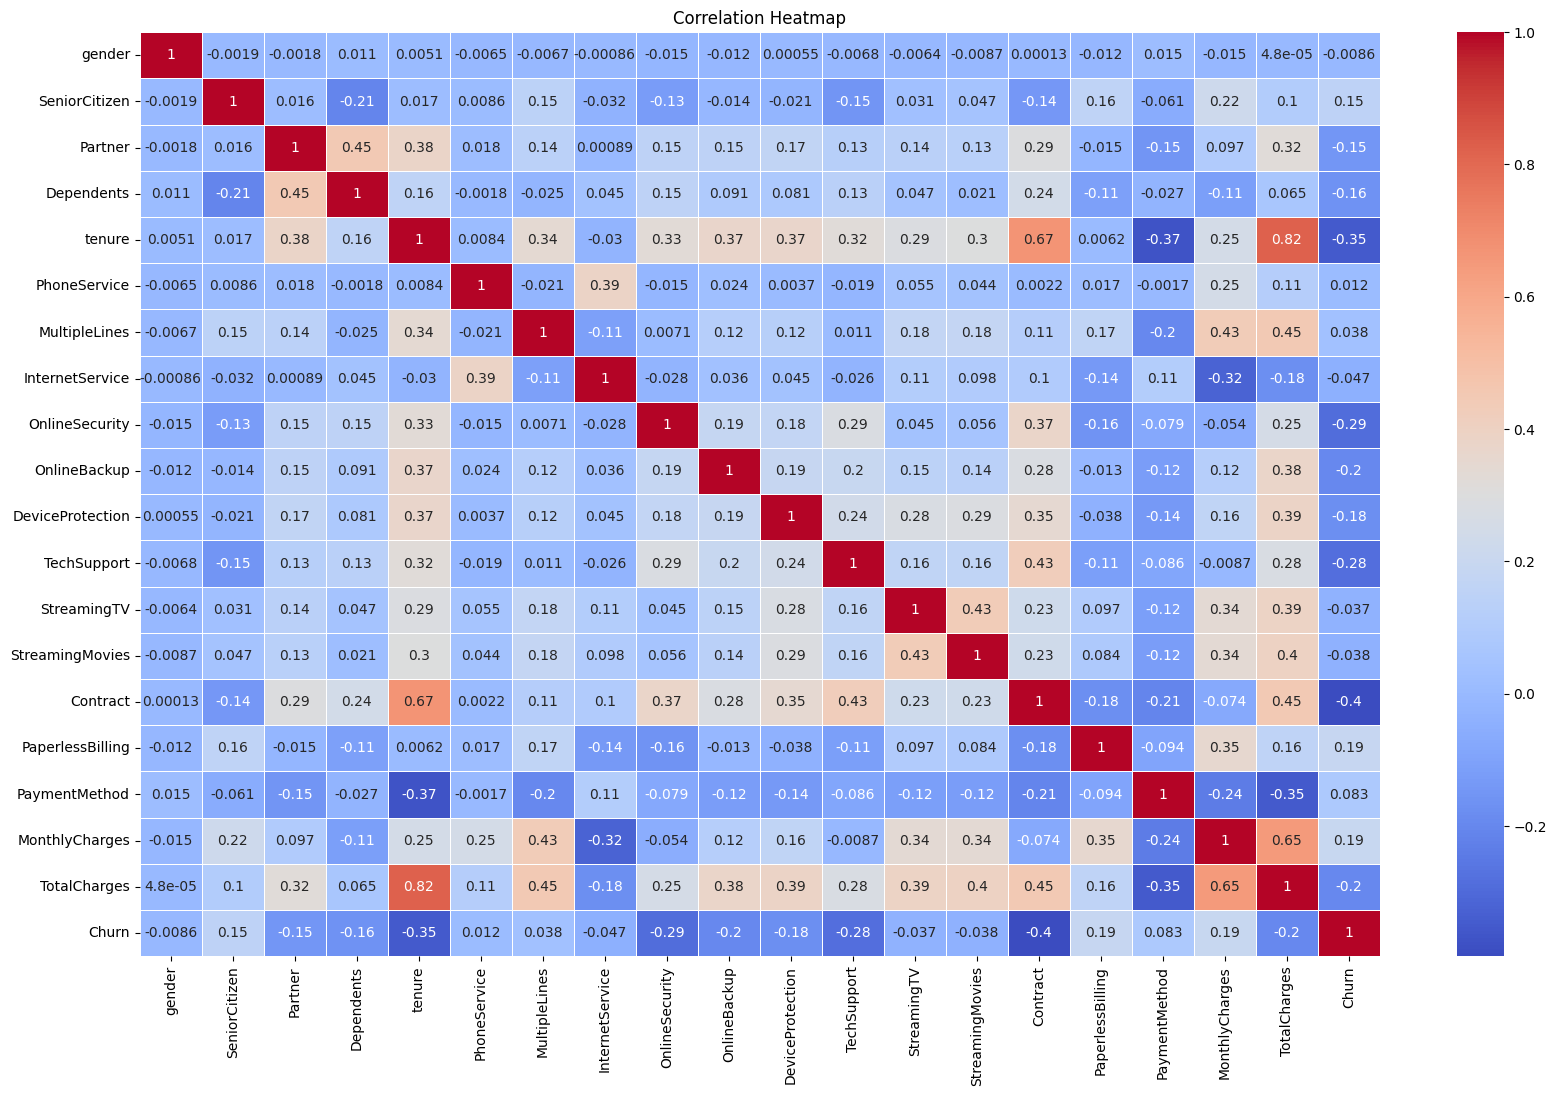

In [28]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

In [29]:
x=df.drop(columns=['Churn','gender','MultipleLines','InternetService','StreamingTV','PaymentMethod'])
y=df['Churn']

In [30]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [34]:
!pip install imbalanced-learn


In [37]:
!pip install --upgrade scikit-learn imbalanced-learn

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter
#smote for sampling as there was imbalance
smote = SMOTE(random_state=42,k_neighbors=15)
X_resampled, y_resampled = smote.fit_resample(x, y)

print(Counter(y_resampled))

Counter({0: 5174, 1: 5174})


C:\Users\deend\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [40]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [42]:
columns_to_scale = ['tenure','TotalCharges','MonthlyCharges']
scaler = StandardScaler()

x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])

x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

In [43]:
model=KNeighborsClassifier(n_neighbors=17)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.8103059581320451


In [44]:
rf = RandomForestClassifier(n_estimators=250, max_depth=8)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.8622117906944636
Testing Accuracy: 0.8247987117552334


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameters distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [5, 8, 12, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    cv=5,
    verbose=2,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

# Best Parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate
best_rf = random_search.best_estimator_
y_test_pred = best_rf.predict(x_test)
print("Optimized Test Accuracy:", accuracy_score(y_test, y_test_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 482}
Optimized Test Accuracy: 0.8402576489533011
